# файл для абс анализа номенклатуры


In [122]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# Загрузил таблицу, две проблемы: 1 - запятая отделяет десятичную часть, 2 - пробелы между цифрами, пример 1 000, 2 000 и т.д.
# Это не даёт возможность поменять тип на float64, сами столбцы с такими числами имеют тип object
m = pd.read_csv('E:\Загрузки\файлы для анализа/abc.csv',
                sep=',', decimal=',')  # таблица для абс-анализа
orders = m.copy()

display(orders['Прибыль'].loc[::7].head(), 'пример необработанных данных')

0       -695,26
7        983,55
14      -522,94
21    -1 561,72
28       753,61
Name: Прибыль, dtype: object

'пример необработанных данных'

# Подготовка данных к анализу

In [123]:
# меняем запятую на точку в питоне
orders['Выручка'] = [x.replace(',', '.') for x in orders['Выручка']]
orders['Прибыль'] = orders['Прибыль'].apply(
    lambda x: x.replace(',', '.'))  # 2 способ это сделать

def shift_split(x):  # функция, чтобы убрать пробел между разделителем на 1000
    x = x.split()
    x = ''.join(x)
    return x

orders['Прибыль'] = orders['Прибыль'].apply(shift_split) #применяем метод + функцию к столбцам
orders['Выручка'] = orders['Выручка'].apply(shift_split)
orders['Прибыль'] = orders['Прибыль'].astype('float64') #меняем тип данных
orders['Выручка'] = orders['Выручка'].astype('float64')

# Готовим новые признаки(столбцы) для анализа
set_abc = orders.groupby('Продукт', as_index = False)[['Прибыль', 'Выручка']].sum() #сохраним нужные данные в переменную - y
set_abc.sort_values('Выручка', ascending = False, inplace = True)
set_abc['cumsum'] = set_abc['Выручка'].cumsum()
set_abc['percent'] = (set_abc['cumsum']/set_abc['Выручка'].sum()).round(3)
set_abc['ABC'] = set_abc['percent'].apply(
   lambda x: 'A' if x <= 0.8 else 'B' if x <= 0.95 else 'C')



# Выручка по группам ABC

In [124]:
display(set_abc.groupby('ABC')['Выручка'].sum(), 'итог АБС-анализа')

ABC
A    876766.22
B    165427.65
C     54894.05
Name: Выручка, dtype: float64

'итог АБС-анализа'

# Рентабельность и Товары группы А

In [125]:
revenue = set_abc['Выручка'].sum()
profit = set_abc['Прибыль'].sum()
profitability = profit/revenue
print(round(profitability, 2), '- расчёт рентабельности')  # рентабельность равна 0.23 или 23%
mask = set_abc['ABC']=='A'
display(set_abc[mask][['Продукт', 'ABC']], 'товары группы А')


0.23 - расчёт рентабельности


,Продукт,ABC
310,Sharp AL-1530CS Digital Copier,A
111,Canon PC1060 Personal Laser Copier,A
112,Canon imageCLASS 2200 Advanced Copier,A
9,2160i,A
225,Hoover WindTunnelв„ў Plus Canister Vacuum,A
...,...,...
265,MicroTAC 650,A
441,g520,A
317,Southworth 25% Cotton Premium Laser Paper and ...,A
270,Motorola SB4200 Cable Modem,A


'товары группы А'

# соотношение количества товаров

In [126]:
pie = set_abc['ABC'].value_counts() # для графика
display(set_abc['ABC'].value_counts(normalize=True).round(2))


C    0.47
B    0.28
A    0.25
Name: ABC, dtype: float64

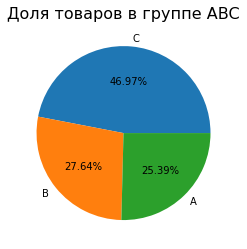

In [127]:
fig, axes = plt.subplots()
axes.pie(pie, labels = pie.index, autopct='%.2f%%')
axes.set_title('Доля товаров в группе ABC', fontsize=16);